#Rain Prediction
### overall workflow/steps

1. Understand the problem statement
2. Extrating the Data
3. Preprocessing the Data: EDD,Feature Engineering, Feature selection
4. Building and training the Model
5. Evaluating the Model
7. Conclusion



Getting libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

getting data

In [2]:
df = pd.dfs = pd.read_excel("/content/sydney_rain prediction.xlsx")

#Preprocessing of the Data

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [8]:
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [ ]:
# We are having skewed dataset

In [ ]:
correlation = df.corr()
correlation

<ipython-input-10-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.770893,0.012883,0.571257,-0.063154,0.052490,0.271686,-0.393827,-0.356406,0.260508,0.180094,0.939116,0.752922
MaxTemp,0.770893,1.000000,-0.140107,0.513138,0.326683,-0.187437,-0.152615,-0.389088,-0.425169,-0.095859,-0.108426,0.859346,0.960457
Rainfall,0.012883,-0.140107,1.000000,-0.126143,-0.308044,0.331045,0.301681,-0.037051,0.003216,0.277427,0.229576,-0.056061,-0.143698
Evaporation,0.571257,0.513138,-0.126143,1.000000,0.177628,-0.399019,-0.103246,-0.349421,-0.303330,-0.041160,-0.041205,0.608872,0.477629
Sunshine,-0.063154,0.326683,-0.308044,0.177628,1.000000,-0.490967,-0.585736,-0.046654,-0.094841,-0.734302,-0.751838,0.115135,0.345139
Humidity9am,0.052490,-0.187437,0.331045,-0.399019,-0.490967,1.000000,0.659194,0.263977,0.252360,0.459455,0.359910,-0.148239,-0.157598
Humidity3pm,0.271686,-0.152615,0.301681,-0.103246,-0.585736,0.659194,1.000000,0.154908,0.183647,0.498119,0.517755,0.128818,-0.214047
Pressure9am,-0.393827,-0.389088,-0.037051,-0.349421,-0.046654,0.263977,0.154908,1.000000,0.963173,-0.012196,-0.044233,-0.419440,-0.346731
Pressure3pm,-0.356406,-0.425169,0.003216,-0.303330,-0.094841,0.252360,0.183647,0.963173,1.000000,0.020884,-0.003187,-0.405047,-0.392653
Cloud9am,0.260508,-0.095859,0.277427,-0.041160,-0.734302,0.459455,0.498119,-0.012196,0.020884,1.000000,0.609556,0.097135,-0.098202


<Axes: >

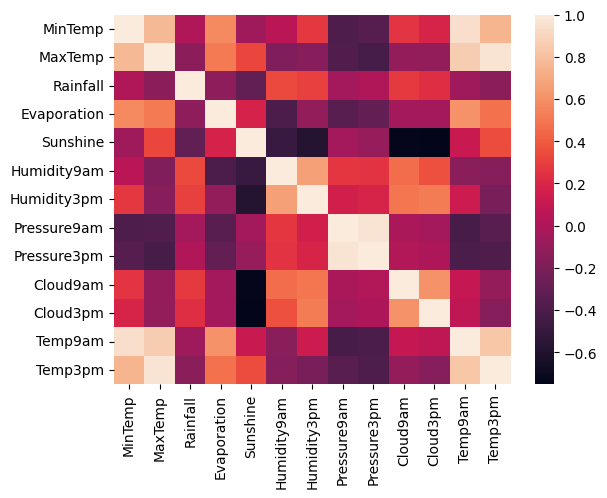

In [ ]:
sns.heatmap(correlation)

In [ ]:
# we should combine MinTemp, MaxTemp, temp3pm and temp9am as it has high covariance -- done in the later part --

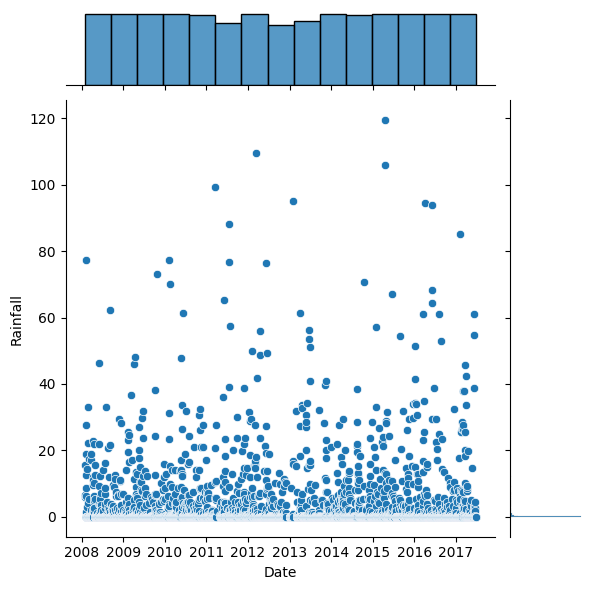

In [ ]:
sns.jointplot(x='Date', y = 'Rainfall',data = df)

<Axes: xlabel='Location', ylabel='count'>

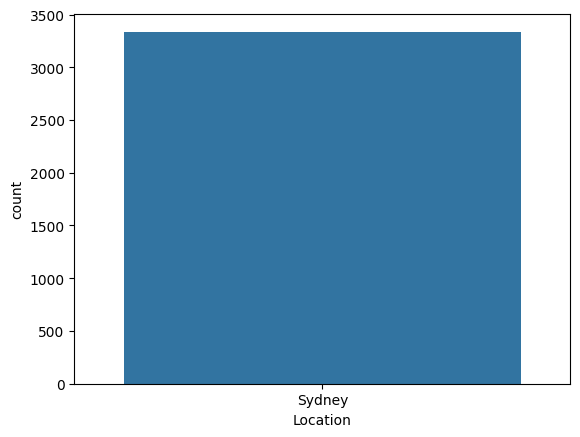

In [ ]:
# Since the only location is Sydney we will be removing this feature
sns.countplot(x='Location',data= df)

In [ ]:
df = df.drop('Location',axis=1)

<Axes: xlabel='RainToday', ylabel='count'>

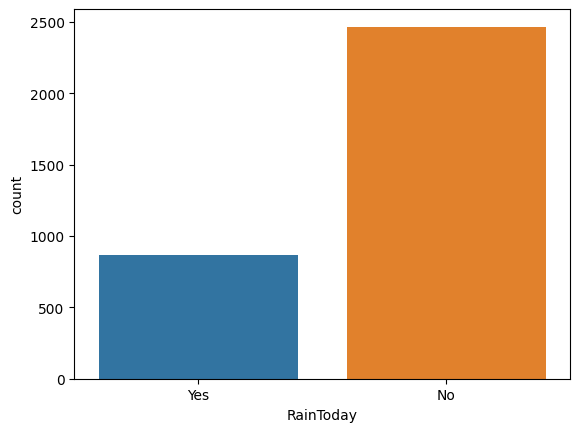

In [ ]:
sns.countplot(x='RainToday',data= df)

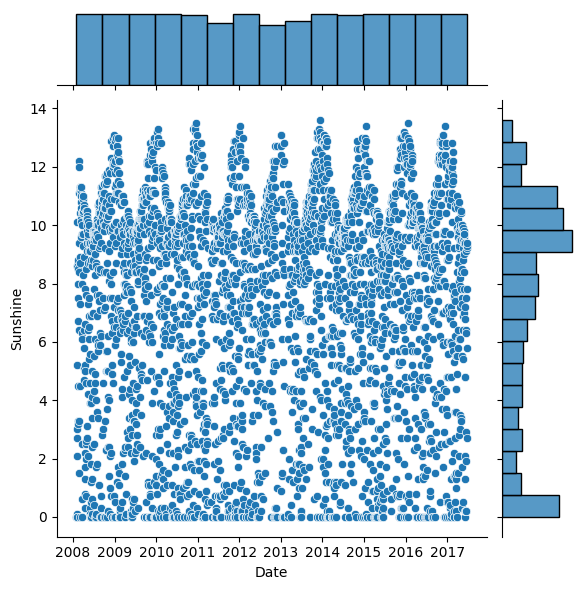

In [ ]:
sns.jointplot(x='Date', y = 'Sunshine',data = df)

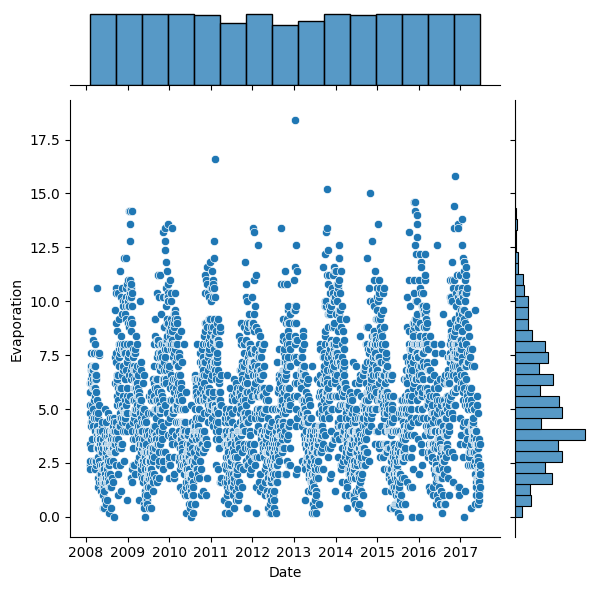

In [ ]:
sns.jointplot(x='Date', y = 'Evaporation',data = df)

<Axes: xlabel='RainTomorrow', ylabel='count'>

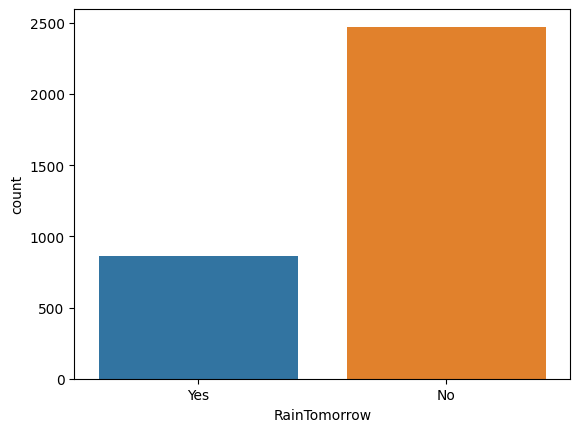

In [ ]:
sns.countplot(x='RainTomorrow',data= df)

### Combining Features (which are correlated to each other) And then visualizing them

In [ ]:
df['avg_humidity'] = (df.Humidity3pm + df.Humidity9am)/2
df['avg_pressure'] = (df.Pressure3pm +df.Pressure9am)/2
df['avg_cloud'] = (df.Cloud3pm + df.Cloud9am)/2
df['avg_temp'] = (df.Temp3pm + df.Temp9am + df.MaxTemp)/3

In [ ]:
df = df.drop(['Humidity3pm','Humidity9am', 'Pressure3pm','Pressure9am','Cloud3pm','Cloud9am','Temp3pm','Temp9am','MaxTemp','MinTemp'],axis=1)

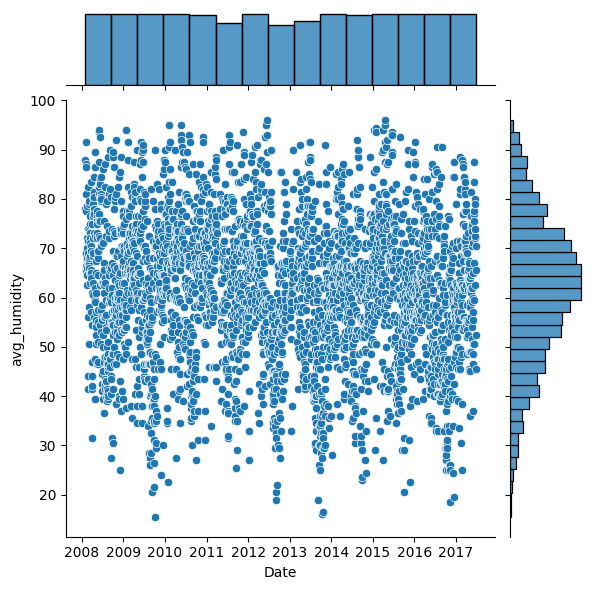

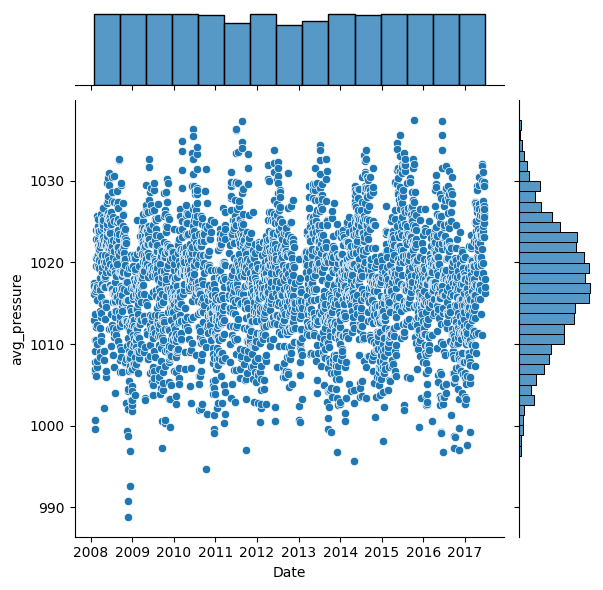

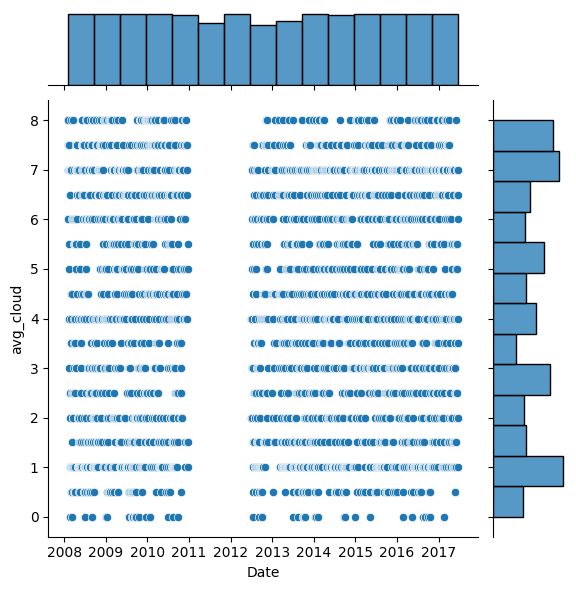

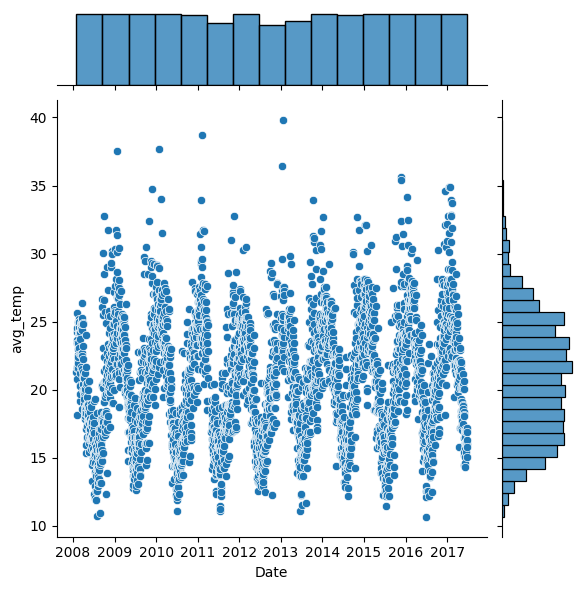

In [ ]:
sns.jointplot(x='Date', y = 'avg_humidity',data = df)
sns.jointplot(x='Date', y = 'avg_pressure',data = df)
sns.jointplot(x='Date', y = 'avg_cloud',data = df)
sns.jointplot(x='Date', y = 'avg_temp',data = df)


### Dealing with NULL values

In [ ]:
# we are going to deal with only null values of evaporation and cloud
# and then remove remaining all rows having null data

# for clouds we will be putting group_avg(rain today)
# 1 average of clouds when it rains and another when it doesn't

df['avg_cloud']=df['avg_cloud'].fillna(df.groupby(['RainToday'])['avg_cloud'].transform('mean'))

# mean of evaporation
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())

# reamining null data is very few 30-40 which we can drop totally
df=df.dropna()





### Creating Dummy variables

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df = df.drop(['RainToday_No','RainTomorrow_No'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3273 entries, 0 to 3336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3273 non-null   datetime64[ns]
 1   Rainfall          3273 non-null   float64       
 2   Evaporation       3273 non-null   float64       
 3   Sunshine          3273 non-null   float64       
 4   avg_humidity      3273 non-null   float64       
 5   avg_pressure      3273 non-null   float64       
 6   avg_cloud         3273 non-null   float64       
 7   avg_temp          3273 non-null   float64       
 8   RainToday_Yes     3273 non-null   uint8         
 9   RainTomorrow_Yes  3273 non-null   uint8         
dtypes: datetime64[ns](1), float64(7), uint8(2)
memory usage: 236.5 KB


## Outliers

This are all the column which may having outliers:

    rainfall(top), -- confirm that it has outliers as it is skewed dataset --
    avg_temp(top),
    avg_presure(bottom),
    evaporation(top)

    

In [ ]:
np.percentile(df.avg_temp,[99])

array([31.676])

In [ ]:
uv=np.percentile(df.avg_temp,[99])[0]
df.avg_temp[(df.avg_temp)>3*uv] = 3*uv
lv = np.percentile(df.avg_temp,[1])[0]
df.avg_temp[(df.avg_temp)<0.3*lv] = 0.3*lv

<ipython-input-24-63ec4b61148e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_temp[(df.avg_temp)>3*uv] = 3*uv
<ipython-input-24-63ec4b61148e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_temp[(df.avg_temp)<0.3*lv] = 0.3*lv


In [ ]:
uv=np.percentile(df.avg_pressure,[99])[0]
df.avg_pressure[(df.avg_pressure)>3*uv] = 3*uv
lv = np.percentile(df.avg_pressure,[1])[0]
df.avg_pressure[(df.avg_pressure)<0.3*lv] = 0.3*lv

<ipython-input-25-df533ca6aff2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_pressure[(df.avg_pressure)>3*uv] = 3*uv
<ipython-input-25-df533ca6aff2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_pressure[(df.avg_pressure)<0.3*lv] = 0.3*lv


In [ ]:
uv=np.percentile(df.Evaporation,[99])[0]
df.Evaporation   [(df.Evaporation)>3*uv] = 3*uv
lv = np.percentile(df.Evaporation,[1])[0]
df.Evaporation   [(df.Evaporation)<0.3*lv] = 0.3*lv

<ipython-input-26-ffc489363962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Evaporation   [(df.Evaporation)>3*uv] = 3*uv
<ipython-input-26-ffc489363962>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Evaporation   [(df.Evaporation)<0.3*lv] = 0.3*lv


In [ ]:
uv=np.percentile(df.Rainfall,[99])[0]
df.Rainfall[(df.Rainfall)>3*uv] = 3*uv
lv = np.percentile(df.Rainfall,[1])[0]
df.Rainfall[(df.Rainfall)<0.3*lv] = 0.3*lv

<ipython-input-27-629181f3b7de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall)>3*uv] = 3*uv
<ipython-input-27-629181f3b7de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall)<0.3*lv] = 0.3*lv


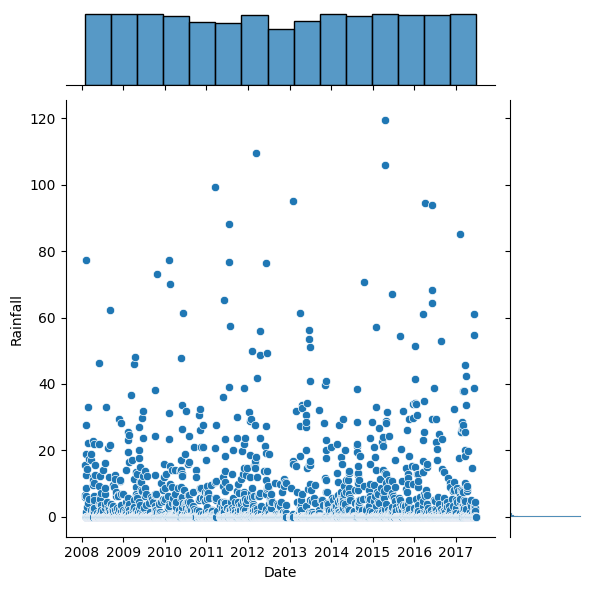

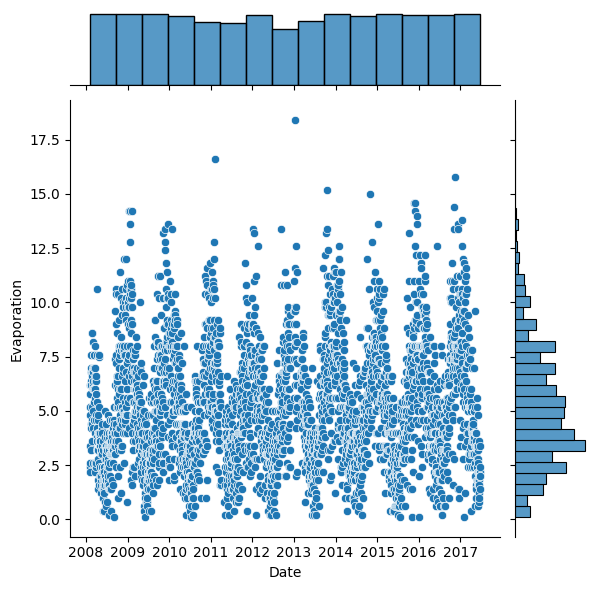

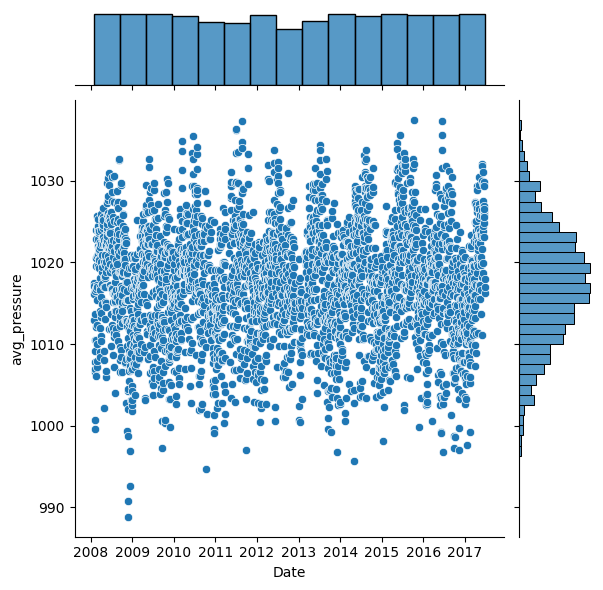

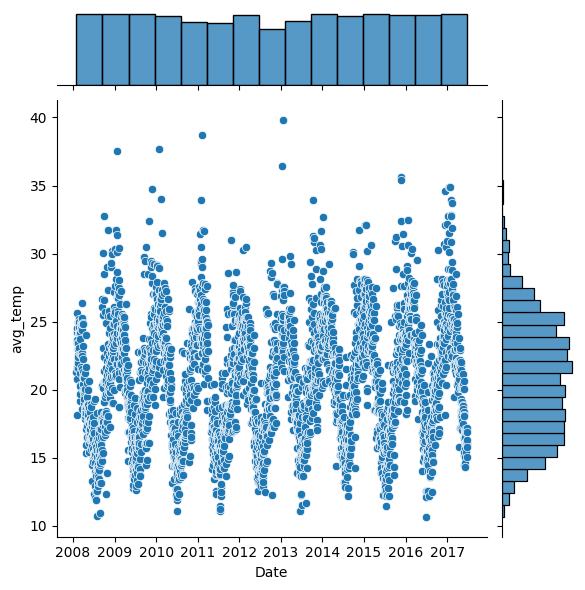

In [ ]:
# understanding in which case the outliers have changed
# (After Running this ) you can see outlier are mostly present in rainfall dataset not in other dataset
sns.jointplot(x='Date', y = 'Rainfall',data = df)
sns.jointplot(x='Date', y = 'Evaporation',data = df)
sns.jointplot(x='Date', y = 'avg_pressure',data = df)
sns.jointplot(x='Date', y = 'avg_temp',data = df)

In [ ]:
# Since all the preprocessing and Data visualization is done we will be removing DATE column
df = df.drop('Date',axis=1)

## Spliting the Data

In [ ]:
x_multi = df.drop('RainTomorrow_Yes',axis=1)
y_multi = df['RainTomorrow_Yes']
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

# import necessary libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,precision_score,recall_score, roc_auc_score, accuracy_score
from sklearn import tree,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier ,RandomForestClassifier,GradientBoostingClassifier

#Training Models

## Logistic Regression   (Accuracy: 0.8336)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.coef_

array([[ 1.14434189e-02,  6.52559572e-02, -1.89177650e-01,
         5.29457277e-02, -4.16303232e-03,  7.69864338e-02,
         3.39501646e-04,  4.18415774e-01]])

In [ ]:
lr.intercept_

array([0.00451494])

In [ ]:
#statistic model

In [ ]:
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sm

In [ ]:
x_cons = sn.add_constant(x_train)
logit = sm.Logit(y_train,x_cons).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 2618
Model:                          Logit   Df Residuals:                     2609
Method:                           MLE   Df Model:                            8
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                     inf
Time:                        15:42:03   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            20.9833      9.160      2.291      0.022       3.030      38.937
Rainfall          0.0076      0.007      1.104      0.270      -0.006       0.021
Evaporation       0.0773      0.025      3.080      0.002       0.028       0.127
Sunshine         -0.2042      0.024     -8.612      0.000      -0.251      -0.158
avg_humidity      0.0524      0.006      8.717      0.000       0.041       0.064
avg_pressure     -0.0242      0.009     -2.710      0.007      -0.042      -0.007
avg_cloud         0.0591      0.042      1.416      0.157      -0.023       0.141
avg_temp         -0.0221      0.018     -1.238      0.216      -0.057       0.013
RainToday_Yes     0.5565      0.146      3.812      0.000       0.270       0.843
=================================================================================
"""

### Evaluating

In [ ]:
# lr.predict_proba(x_test)
y_pred = lr.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[454,  25],
       [ 84,  92]])

In [ ]:
precision_score(y_test,y_pred)

0.7863247863247863

In [ ]:
recall_score(y_test,y_pred)

0.5227272727272727

In [ ]:
roc_auc_score(y_test,y_pred)

0.7352676029607136

In [ ]:
accuracy_score(y_test,y_pred)

0.833587786259542

## LDA (Accuracy: 0.8382)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)


LinearDiscriminantAnalysis()

### Evaluating

In [ ]:
y_pred = lda.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[445,  34],
       [ 72, 104]])

In [ ]:
precision_score(y_test,y_pred)

0.7536231884057971

In [ ]:
recall_score(y_test,y_pred)

0.5909090909090909

In [ ]:
roc_auc_score(y_test,y_pred)

0.7599639400265705

In [ ]:
accuracy_score(y_test,y_pred)

0.8381679389312977

## K-nearest Neighbours (Accuracy: 0.83664)

In [ ]:
# Standardizing the values
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_s = scaler.transform(x_test)

### Getting best model KNN

In [ ]:
params = {'n_neighbors':[10, 20, 40, 60, 80, 100]}
grid_search = GridSearchCV(KNeighborsClassifier(),params)
grid_search.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [20, 40, 60, 80, 100]})

In [ ]:
grid_search.best_params_

{'n_neighbors': 20}

In [ ]:
knn = grid_search.best_estimator_

### Evaluating

In [ ]:
y_pred = knn.predict(x_test_s)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[470,   9],
       [ 98,  78]])

In [ ]:
precision_score(y_test,y_pred)

0.896551724137931

In [ ]:
recall_score(y_test,y_pred)

0.4431818181818182

In [ ]:
roc_auc_score(y_test,y_pred)

0.7121963370658569

In [ ]:
accuracy_score(y_test,y_pred)

0.8366412213740458

## Decision tree (Accuracy: 0.82137)


In [ ]:
# ctree = tree.DecisionTreeClassifier(max_depth=4)
# ctree.fit(x_train,y_train)     ---we just use gridsearchCV to get the best parameters ---
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10] }
grid_search = GridSearchCV(tree.DecisionTreeClassifier(),params)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
ctree = grid_search.best_estimator_



{'max_depth': 3}


### Evaluating

In [ ]:
y_pred = ctree.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[471,   8],
       [109,  67]])

In [ ]:
precision_score(y_test,y_pred)

0.8933333333333333

In [ ]:
recall_score(y_test,y_pred)

0.3806818181818182

In [ ]:
roc_auc_score(y_test,y_pred)

0.6819901784019737

In [ ]:
accuracy_score(y_test,y_pred)

0.8213740458015267

## Bagging Classifier (Accuracy: 0.8305)

In [ ]:
# creating a base model and base estimtor for that model
ctree = tree.DecisionTreeClassifier()
bag = BaggingClassifier(estimator=ctree,
                        bootstrap=True,n_jobs=-1,random_state = 42)

# parameter on which model is to be tested
params = {'n_estimators': [100,200,300,400,500,600,700] }

# getting best bagging model as per pararmeters/ (hyper tuning the model)
grid_search = GridSearchCV(bag,params)
grid_search.fit(x_train,y_train)

# printing the best parameters
print(grid_search.best_params_)
# saving the best model as best_tree
best_tree = grid_search.best_estimator_


{'n_estimators': 300}


### Evaluating

In [ ]:
y_pred = best_tree.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[452,  27],
       [ 84,  92]])

In [ ]:
precision_score(y_test,y_pred)

0.773109243697479

In [ ]:
recall_score(y_test,y_pred)

0.5227272727272727

In [ ]:
roc_auc_score(y_test,y_pred)

0.7331799202884798

In [ ]:
accuracy_score(y_test,y_pred)

0.8305343511450382

## Random forest (Accuracy: 0.84122)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

# parameter on which model is to be tested
params = {'n_estimators': [500,1000],
          "max_features": [4,6,8,10],
          "min_samples_split":[2,3,10]}

# getting best bagging model as per pararmeters / (hyper tuning the model)
grid_search = GridSearchCV(rf,params)
grid_search.fit(x_train,y_train)

# printing the best parameters
print(grid_search.best_params_)
# saving the best model as best_tree
best_tree = grid_search.best_estimator_

{'max_features': 4, 'min_samples_split': 10, 'n_estimators': 1000}


### Evaluating

In [ ]:
y_pred = best_tree.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[460,  19],
       [ 85,  91]])

In [ ]:
precision_score(y_test,y_pred)

0.8272727272727273

In [ ]:
recall_score(y_test,y_pred)

0.5170454545454546

In [ ]:
roc_auc_score(y_test,y_pred)

0.738689741886506

In [ ]:
accuracy_score(y_test,y_pred)

0.8412213740458016

## Boosting (Accuracy: 0.82748)

In [ ]:
gbc = GradientBoostingClassifier()

# parameter on which model is to be tested
params = {"n_estimators": [500,750,1000],
               "learning_rate": [0.05,0.1,0.15],
               "max_depth":[1,2,3,4,5]
               }

# getting best bagging model as per pararmeters / (hyper tuning the model)
grid_search = GridSearchCV(gbc,params)
grid_search.fit(x_train,y_train)
# --- grid_search = GridSearchCV(gbc,params_grid,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')

# printing the best parameters
print(grid_search.best_params_)
# saving the best model as best_tree
best_tree = grid_search.best_estimator_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 750}


### Evaluating

In [ ]:
y_pred = best_tree.predict(x_test)


In [ ]:
confusion_matrix(y_test,y_pred)

array([[450,  29],
       [ 84,  92]])

In [ ]:
precision_score(y_test,y_pred)

0.7603305785123967

In [ ]:
recall_score(y_test,y_pred)

0.5227272727272727

In [ ]:
roc_auc_score(y_test,y_pred)

0.731092237616246

In [ ]:
accuracy_score(y_test,y_pred)

0.8274809160305343

In [ ]:
# since accuracy is lowwest we wont be going to other bosting methods

# Summary

The problem statement:

   * So this is News Paper comapny which want to predit whether it will rain or not for the **next day** (as newspaper is distributed early morning so data collected will be of previous day).This is our dependent feature and others are independent feature
   * We are given different data collected at 3 am and 9 pm. We need the statistics for each feature (at least for some common features like temperature and cloud) this is because we can say that if temperature falls below so and so it may rain today or if it remains cloudy will rain.


---


Approach to solving this task:

* Getting/Extracting the Dataset - In this case Data is prepared for us. (In some cases we need to gather the data by using webscrapping )
* Data Preprocessing:
    * Exploratory Data Analysis - This involves understanding (Exploring) the dataset using different visualization techniques, in this case we will be using seaborn library for visualiztion.so that we can perform Feature Engineering and Feature Selection. In this case we found out that the data is skewed
    * Feature Engineering and Feature Selection - This steps includes handling the missing data and working with outliers, feature scaling and feature transformation, onehot encoding, catgorical encoding and splitting of the dataset for train and training. In this case missing data was replced with group mean values of rainfall for cloud and other data was removed for feature selection we combined few features and removed location features from the dataset

* Model Building, training and evaluating: Now we need to build the model in this case we are using the sklearn library and we are only looking at the classification models. Then we need to fit and transform the model with the training data. And then the testing dataset is used to evaluate this model using different evaluation methods like cross validation,acurracy_score,f2_score,RMSE,R square. Also to gain the statistical knowledge.

* Conclusion: Select the best model out there and find out why try to improve this model further by fine tuning the hyper parameters.


---

Choosing the Machine Learning model for this task:

As I have discussed before all Classification models can be used in this case. After Preprocessing it is clear that visibly there is no linear correlation but Since we needed statistical data we have used
*   Logisti Regression
*   LDA
*   KNN

In the case of Decision tree and ensemble technique we have used
*   regressionDecision
*   Bagging
*   Random forest
*   Boosting

---

Conclusion:

It is Randomforest as Decision tree are better than linear_regression models and since Randomforest is an ensemble technique it is better than a simple DecisionTree.

Boosting reduces the bias so when comming to test data it is reducing its performance you can clearly see this as after hyper tuning we are getting higher acuuracy for test dataset compared to randomly choosen data set. thats the reason why we are not going for adaboosting and all

Below are the results for testing Dataset

[RandomForest Model](#scrollTo=BGf0nvE2l4nn&line=1&uniqifier=1) :  { 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 1000 }

*   Accuracy = 0.8412




Liner_models: [LDA](#scrollTo=Bo8WOYzUqfX5&line=1&uniqifier=1)
* r2 value = 0.838


---

5. What steps can you take to improve this selected model’s performance even further?

    * We can further tune this model by trying out different hyper parameters(maximum number of features ,number of estimators,maximum depth of the trees).
    * Train on more data.
    * Evaluate the model with a variety of metrics.
    * Since our priority is predicting rain we can focus on reducing False positive compared to False negative.
    As its ok to sometime give prediction that it may rain even though the chances are less so that people can always take precaitions.
    * adding more features







Stats model is in [Logistic regression](#scrollTo=NVMjaP_aqqR_&line=1&uniqifier=1)

In [ ]:
# click on hyper link to go to the models -- it will be the top most model --